# Univariate ARIMA Prediction - single asset
## 1. Load libraries

In [1]:
#import libraries
import pandas as pd
from pandas import DataFrame 
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,10
%matplotlib inline

#import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import numpy as np
from numpy import log

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

#from io import StringIO
import time, json

rcParams['figure.figsize'] = 18,10

import warnings 
warnings.filterwarnings('ignore')

## 2. Load and visualize time series dataset
### 2.1 Load data
Asset data of weekly frequency named xxx.csv is downloaded from Yahoo Finance UK (or API??) is loaded into the notebook by the def GetData function. The loaded data is presented as a float32 datatype in a DataFrame format.

In [12]:
%store -r data_IVV
%store -r data_SHY
%store -r data_VNQ
%store -r data_GLD


In [3]:
#Developed market ETF
data_GLD.columns = ['Adj_Close']
data_GLD.head()


,Adj_Close
Date,
2009-06-01,93.709999
2009-06-08,92.169998
2009-06-15,91.900002
2009-06-22,92.290001
2009-06-29,91.250000


### 2.2 Visualize time series trend graph
Depict how EFA trends over time and highlight the separation of testing and training periods.

In [4]:
#Statistical info on MCD
data_GLD.describe()

,Adj_Close
count,522.000000
mean,127.313370
std,19.082916
min,89.580002
25%,115.502499
50%,122.230000
75%,133.654995
max,183.240005


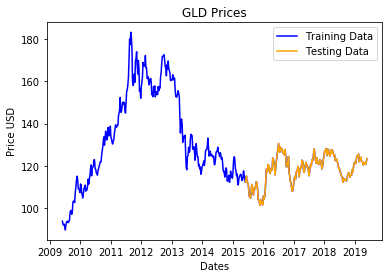

In [5]:
# !! shading !! ##

#Divide data into training and testing
train_data, test_data = data_GLD[0:int(len(data_GLD)*0.4)], data_GLD[int(len(data_GLD)*0.6):]
#plt.figure(figsize=(12,7))
plt.title('GLD Prices')
plt.xlabel('Dates')
plt.ylabel('Price USD')
plt.plot(data_GLD['Adj_Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj_Close'], 'orange', label='Testing Data')
#plt.xticks(np.arange(0,7982, 1300), data_MCD_df['Date'][0:7982:1300])
plt.legend()

In [13]:
#scale data
mm = MinMaxScaler()

In [14]:
scaled_IVV = mm.fit_transform(data_IVV)
scaled_SHY = mm.fit_transform(data_SHY)
scaled_VNQ = mm.fit_transform(data_VNQ)
scaled_GLD = mm.fit_transform(data_GLD)


In [17]:
#Change datasets to DataFrame
data_IVV_df = pd.DataFrame(data_IVV)
scaled_IVV_df = pd.DataFrame(scaled_IVV)

data_SHY_df = pd.DataFrame(data_SHY)
scaled_SHY_df = pd.DataFrame(scaled_SHY)

data_VNQ_df = pd.DataFrame(data_VNQ)
scaled_VNQ_df = pd.DataFrame(scaled_VNQ)

data_GLD_df = pd.DataFrame(data_GLD)
scaled_GLD_df = pd.DataFrame(scaled_GLD)

In [18]:
data_IVV_df.index
data_SHY_df.index
data_VNQ_df.index
data_GLD_df.index

DatetimeIndex(['2009-06-01', '2009-06-08', '2009-06-15', '2009-06-22',
               '2009-06-29', '2009-07-06', '2009-07-13', '2009-07-20',
               '2009-07-27', '2009-08-03',
               ...
               '2019-03-25', '2019-04-01', '2019-04-08', '2019-04-15',
               '2019-04-22', '2019-04-29', '2019-05-06', '2019-05-13',
               '2019-05-20', '2019-05-27'],
              dtype='datetime64[ns]', name='Date', length=522, freq=None)

In [30]:
train_data_IVV, test_data_IVV = data_IVV_df[0:int(len(data_IVV_df)*0.6)], data_IVV_df[int(len(data_IVV_df)*0.6):]
train_data_SHY, test_data_SHY = data_SHY_df[0:int(len(data_SHY_df)*0.6)], data_SHY_df[int(len(data_SHY_df)*0.6):]
train_data_VNQ, test_data_VNQ = data_VNQ_df[0:int(len(data_VNQ_df)*0.6)], data_VNQ_df[int(len(data_VNQ_df)*0.6):]
train_data_GLD, test_data_GLD = data_GLD_df[0:int(len(data_GLD_df)*0.6)], data_GLD_df[int(len(data_GLD_df)*0.6):]


In [24]:
train_ar_IVV = train_data_IVV.values
test_ar_IVV = test_data_IVV['Adj Close'].values
history_IVV = [x for x in train_ar_IVV]
predictions_IVV = list()
for t in range(len(test_ar_IVV)):
    model = ARIMA(history_IVV, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_IVV.append(yhat)
    obs = test_ar_IVV[t]
    history_IVV.append(obs)
error = mean_squared_error(test_ar_IVV, predictions_IVV)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 20.596


In [25]:
train_ar_SHY = train_data_SHY.values
test_ar_SHY = test_data_SHY['Adj Close'].values
history_SHY = [x for x in train_ar_SHY]
predictions_SHY = list()
for t in range(len(test_ar_SHY)):
    model = ARIMA(history_SHY, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_SHY.append(yhat)
    obs = test_ar_SHY[t]
    history_SHY.append(obs)
error = mean_squared_error(test_ar_SHY, predictions_SHY)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 0.014


In [31]:
train_ar_VNQ = train_data_VNQ.values
test_ar_VNQ = test_data_VNQ['Adj Close'].values
history_VNQ = [x for x in train_ar_VNQ]
predictions_VNQ = list()
for t in range(len(test_ar_VNQ)):
    model = ARIMA(history_VNQ, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_VNQ.append(yhat)
    obs = test_ar_VNQ[t]
    history_VNQ.append(obs)
error = mean_squared_error(test_ar_VNQ, predictions_VNQ)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 2.418


In [28]:
train_ar_GLD = train_data_GLD.values
test_ar_GLD = test_data_GLD['Adj_Close'].values
history_GLD = [x for x in train_ar_GLD]
predictions_GLD = list()
for t in range(len(test_ar_GLD)):
    model = ARIMA(history_GLD, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_GLD.append(yhat)
    obs = test_ar_GLD[t]
    history_GLD.append(obs)
error = mean_squared_error(test_ar_GLD, predictions_GLD)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 4.100


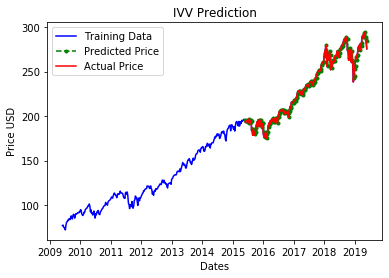

In [33]:
plt.plot(data_IVV_df['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data_IVV.index, predictions_IVV, color='green', marker='.', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data_IVV.index, test_data_IVV['Adj Close'], color='red', label='Actual Price')
plt.title('IVV Prediction')
plt.xlabel('Dates')
plt.ylabel('Price USD')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (209,) and (0,)

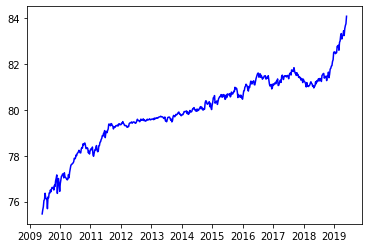

In [34]:
plt.plot(data_SHY_df['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data_SHY.index, predictions_SHY, color='green', marker='.', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data_SHY.index, test_data_SHY['Adj Close'], color='red', label='Actual Price')
plt.title('SHY Prediction')
plt.xlabel('Dates')
plt.ylabel('Price USD')
plt.legend()

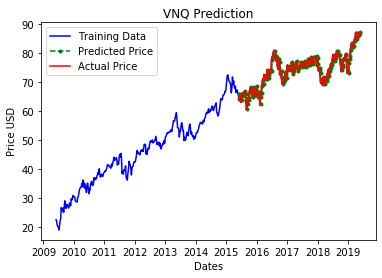

In [37]:
plt.plot(data_VNQ_df['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data_VNQ.index, predictions_VNQ, color='green', marker='.', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data_VNQ.index, test_data_VNQ['Adj Close'], color='red', label='Actual Price')
plt.title('VNQ Prediction')
plt.xlabel('Dates')
plt.ylabel('Price USD')
plt.legend()

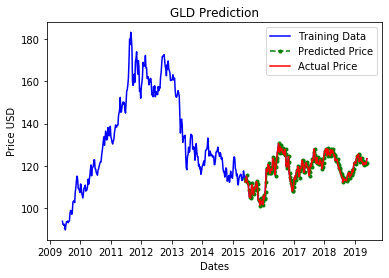

In [35]:
plt.plot(data_GLD_df['Adj_Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='.', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Adj_Close'], color='red', label='Actual Price')
plt.title('GLD Prediction')
plt.xlabel('Dates')
plt.ylabel('Price USD')
plt.legend()